<a href="https://colab.research.google.com/github/NathR-tiny/2025_Intro_Python/blob/main/ex4_agricultural_products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing the transport of chloride and nitrate in an agricultural catchment

We will explore how the water quality in an agricultural catchment evolves throughout the year. We will explore real-world data on nitrate and chloride concentrations, and evaluate the environmental factors influencing nitrate removal.

## Context
You are tasked with analyzing stream water quality data from the Kervidy-Naizin catchment in France:

![](image_study_site.png)

The Kervidy-Naizin catchment is a 5 km² headwater catchment located in western France, primarily used for intensive mixed-farming. This catchment is part of the AgrHys environmental research observatory (more information can be found [here](https://www.ozcar-ri.org/agrhys-observatory/)). From September 1999 to 2012, comprehensive data on water chemistry, hydrology, and meteorology have been collected. The stream often dries out between June and September and this interrupts solute concentration measurements in the summer period.

In this exercise, we will focus on two key elements: chloride and nitrate, both of which enter the catchment mainly from agricultural fertilizers. The rates of application of both solutes in the catchment through fertilizers can be considered as uniform over the year. While chloride acts as a conservative tracer (meaning it doesn’t undergo chemical changes), nitrate is a more reactive compound that can significantly affect water quality.

Nitrate is particularly important because it can lead to the eutrophication of water bodies, causing harmful algal blooms and degrading water quality. Since nitrate often enters water systems through agricultural runoff, it’s useful to understand under which hydrological conditions nitrate removal (through denitrification) is most effective. Denitrification is a process where nitrate is reduced to other nitrogen forms, such as gaseous nitrogen (N₂), thereby removing nitrate from the water.

## The data
We will use the data from the Kervidy-Naizin catchment published by Aubert et al. ([2013](https://pubs.acs.org/doi/10.1021/es403723r)). This dataset contains 12 years of daily measurements of different solutes, among which nitrate ($\textrm{NO}_3^-$) and chloride ($\textrm{Cl}^-$) concentrations, and daily average discharge. The data table has 5022 rows and 52 columns.

You will find the file **data_Naizin_daily.csv** in the **data** folder.



## Exercise
You will explore how the concentration of nitrate evolves throughout the year in streamflow. You will compare nitrate concentrations with chloride, to asses denitrification. Since chloride is a conservative tracer that doesn't undergo chemical transformations, we can use its behavior to estimate what we would expect from nitrate (NO₃⁻) if it hadn't undergone denitrification. By comparing these solutes, you will gain insight into which hydrological and biochemical factors might affect nitrate concentrations:

1. Start by plotting the full time series of chloride and nitrate concentrations, as well as discharge. Then, zoom in on the 2010 hydrological year (from October 1, 2009, to September 30, 2010). This will help you observe the seasonal variation in solute concentrations over the course of a single year. How do the concentrations evolve throughout the 2010 hydrological year?

2. Plot the nitrate concentration against the chloride concentration for the 2010 hydrological year, using different colors to represent three key periods, each associated with different hydrological and biochemical conditions:
    - Period 1: October to December 2009
    - Period 2: January to April 2010
    - Period 3: May to September 2010
    
    How are nitrate and chloride concentrations related during each period?

Chloride and nitrate might have different baseline levels, making it difficult to compare their changes directly. A convenient way to compare them more directly is to normalize the concentrations. This operation removes the influence of different baselines and variability, allowing us to focus on relative changes between the two solutes.

3. Normalize the solute concentrations for the 2010 hydrological year to compare them more easily. Use the following formula:

    $C_{norm}(t) = \frac{C(t) - \bar{C}_{Feb-Sept}}{\sigma_{c, Feb-Sept}}$

    Here, subtract the mean concentration during the period February 1 to September 30, 2010, from the concentration at each time point, and divide by the standard deviation of the same period.
    
    Plot the two normalized concentration timeseries on the same graph. Based on the normalized concentrations, during which period does denitrification appear to influence the streamwater nitrate concentration? What could be the underlying causes of this behavior? Consider the seasonal hydrological and biochemical conditions that might affect nitrate levels in streamwater.

### Load data

In [ ]:
# Load the main packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data_Naizin_daily.xlsx to data_Naizin_daily.xlsx
User uploaded file "data_Naizin_daily.xlsx" with length 610409 bytes


In [ ]:
# Define the file path (you may have a different one)
filepath = 'data_Naizin_daily.xlsx'

# Load the data into a pandas dataframe
df_data = pd.read_excel(filepath, sheet_name='dataset_daily')

print(df_data.head())

# Convert the 'date' column to a datetime format
df_data['date'] = pd.to_datetime(df_data['date'])

# Convert discharge to mm/d
df_data['Q mm/d'] = df_data['avg_Q mm/hr'] * 24

        date       day_ending_6PM  dayno  Water_year        year  pH  \
0 1999-01-01  1999-01-01 00:00:00      1        1999  1999.00000 NaN   
1 1999-01-02  1999-01-02 00:00:00      2        1999  1999.00274 NaN   
2 1999-01-03  1999-01-03 00:00:00      3        1999  1999.00548 NaN   
3 1999-01-04  1999-01-04 00:00:00      4        1999  1999.00822 NaN   
4 1999-01-05  1999-01-05 00:00:00      5        1999  1999.01096 NaN   

   Conductivity mV  Temperature °C  COD mg/l  CID mg/l  ...  asinh_Pb  \
0              NaN             NaN       NaN       NaN  ...       NaN   
1              NaN             NaN       NaN       NaN  ...       NaN   
2              NaN             NaN       NaN       NaN  ...       NaN   
3              NaN             NaN       NaN       NaN  ...       NaN   
4              NaN             NaN       NaN       NaN  ...       NaN   

   Th_(232)  ppb  U_(238)  ppb  Somme_REE  ppb  Cl- mg/l  NO3- mg/l  \
0            NaN           NaN             NaN       NaN 

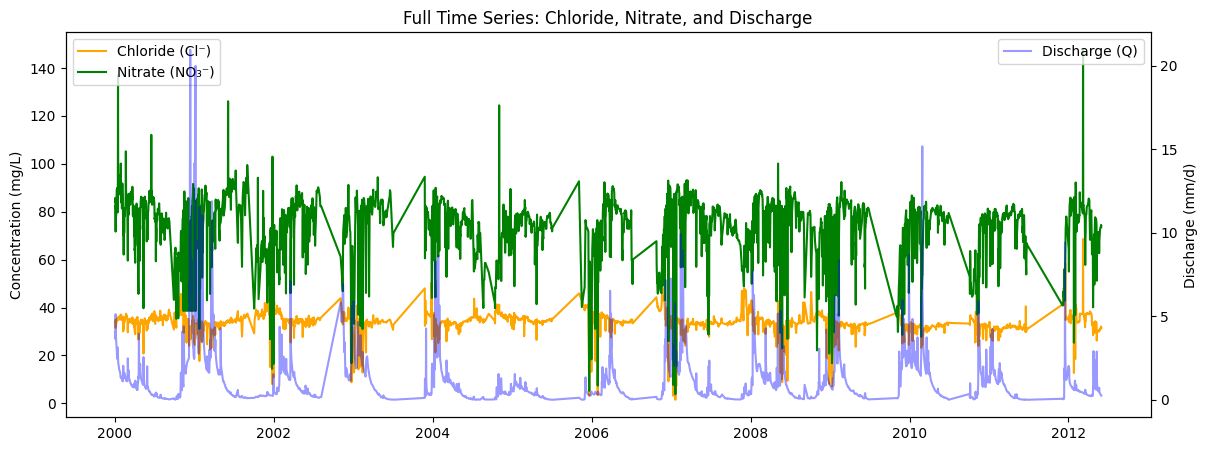

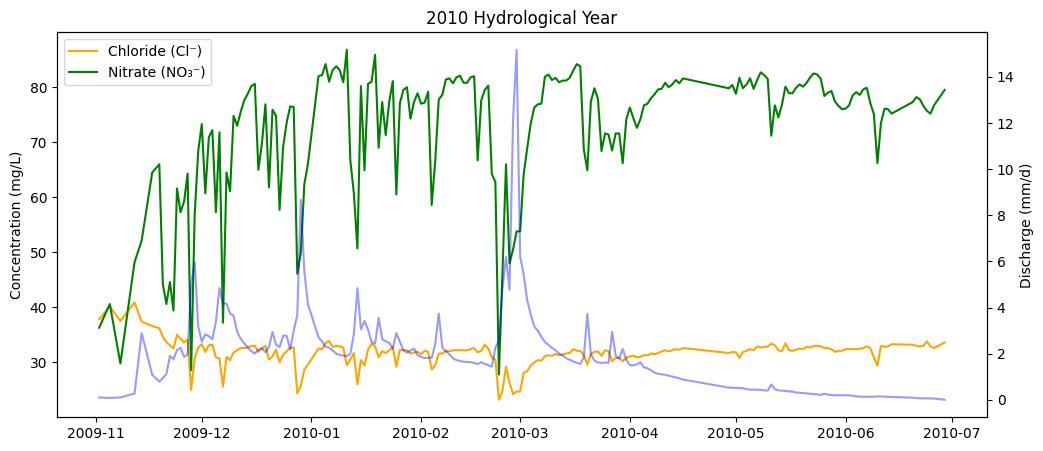

/tmp/ipython-input-242160179.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2010['period'] = pd.cut(


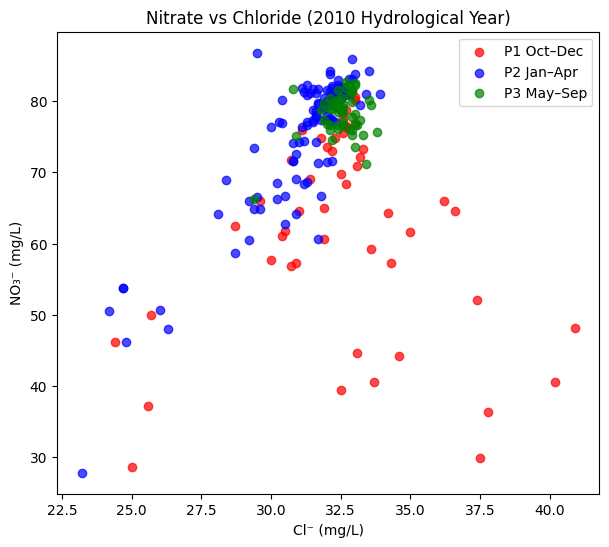

/tmp/ipython-input-242160179.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2010[f'{solute}_norm'] = (df_2010[solute] - mean_val) / std_val
/tmp/ipython-input-242160179.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2010[f'{solute}_norm'] = (df_2010[solute] - mean_val) / std_val


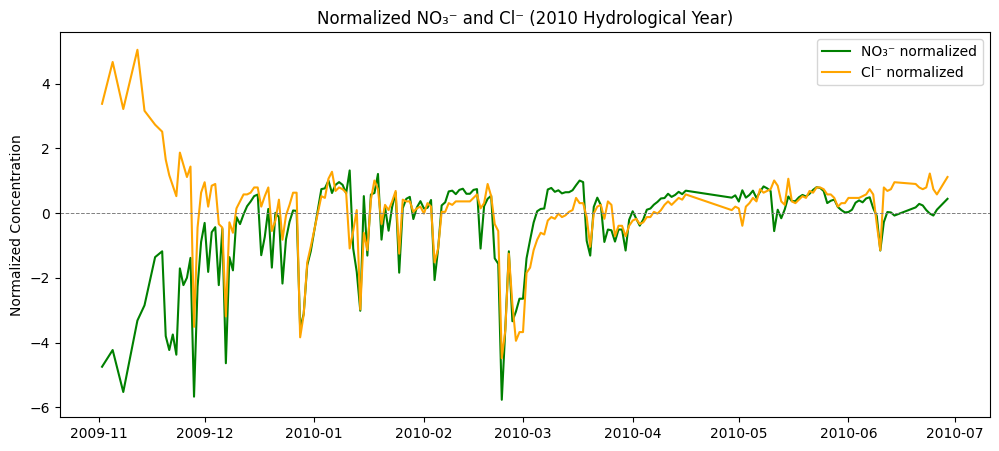

In [ ]:
# --- 1️⃣ Select and clean key variables ---
df = df_data[['date', 'NO3- mg/l', 'Cl- mg/l', 'Q mm/d']].copy()
df.rename(columns={'NO3- mg/l':'NO3', 'Cl- mg/l':'Cl', 'Q mm/d':'Q'}, inplace=True)
df = df.sort_values('date').dropna()

# --- 2️⃣ Plot full time series ---
fig, ax1 = plt.subplots(figsize=(14,5))
ax1.plot(df['date'], df['Cl'], label='Chloride (Cl⁻)', color='orange')
ax1.plot(df['date'], df['NO3'], label='Nitrate (NO₃⁻)', color='green')
ax1.set_ylabel('Concentration (mg/L)')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(df['date'], df['Q'], color='blue', alpha=0.4, label='Discharge (Q)')
ax2.set_ylabel('Discharge (mm/d)')
ax2.legend(loc='upper right')
ax1.set_title('Full Time Series: Chloride, Nitrate, and Discharge')
plt.show()

# --- 3️⃣ Extract 2010 hydrological year (Oct 1, 2009 – Sep 30, 2010) ---
start_2010 = '2009-10-01'
end_2010 = '2010-09-30'
df_2010 = df[(df['date'] >= start_2010) & (df['date'] <= end_2010)]

# --- Plot 2010 hydrological year ---
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(df_2010['date'], df_2010['Cl'], label='Chloride (Cl⁻)', color='orange')
ax1.plot(df_2010['date'], df_2010['NO3'], label='Nitrate (NO₃⁻)', color='green')
ax1.set_ylabel('Concentration (mg/L)')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(df_2010['date'], df_2010['Q'], color='blue', alpha=0.4, label='Discharge (Q)')
ax2.set_ylabel('Discharge (mm/d)')
ax1.set_title('2010 Hydrological Year')
plt.show()

# --- 4️⃣ Define three periods for 2010 ---
df_2010['period'] = pd.cut(
    df_2010['date'],
    bins=[pd.Timestamp('2009-10-01'),
          pd.Timestamp('2009-12-31'),
          pd.Timestamp('2010-04-30'),
          pd.Timestamp('2010-09-30')],
    labels=['P1 Oct–Dec', 'P2 Jan–Apr', 'P3 May–Sep']
)

# --- Scatter plot: NO3 vs Cl per period ---
colors = {'P1 Oct–Dec':'red', 'P2 Jan–Apr':'blue', 'P3 May–Sep':'green'}
plt.figure(figsize=(7,6))
for period, color in colors.items():
    subset = df_2010[df_2010['period'] == period]
    plt.scatter(subset['Cl'], subset['NO3'], label=period, alpha=0.7, color=color)
plt.xlabel('Cl⁻ (mg/L)')
plt.ylabel('NO₃⁻ (mg/L)')
plt.title('Nitrate vs Chloride (2010 Hydrological Year)')
plt.legend()
plt.show()

# --- 5️⃣ Normalize concentrations (Feb–Sep 2010 baseline) ---
baseline = df_2010[(df_2010['date'] >= '2010-02-01') & (df_2010['date'] <= '2010-09-30')]
for solute in ['NO3', 'Cl']:
    mean_val = baseline[solute].mean()
    std_val = baseline[solute].std()
    df_2010[f'{solute}_norm'] = (df_2010[solute] - mean_val) / std_val

# --- Plot normalized concentrations ---
plt.figure(figsize=(12,5))
plt.plot(df_2010['date'], df_2010['NO3_norm'], label='NO₃⁻ normalized', color='green')
plt.plot(df_2010['date'], df_2010['Cl_norm'], label='Cl⁻ normalized', color='orange')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.7)
plt.ylabel('Normalized Concentration')
plt.title('Normalized NO₃⁻ and Cl⁻ (2010 Hydrological Year)')
plt.legend()
plt.show()